<a href="https://colab.research.google.com/github/ShesterG/Twitter-Sentiment-Analysis/blob/master/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for Twitter Sentiment Analysis

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Imports & Constants

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [27]:
DATA_FILE_PATH = '/content/drive/MyDrive/NLPGh/'
DATA_FILE_NAME = 'DataSet2Original.csv'
SAVE_FILE = True


# Read Data File

In [5]:
df = pd.read_csv(DATA_FILE_PATH + DATA_FILE_NAME)

# Initial Review of Data

In [6]:
df.head()

,Unnamed,tweet,location,pretweet,Sentiment
0,65780,Pls add us some momo to make data 0246964913 ...,NaN,pl add some momo make data 0246964913,0.0
1,65781,@McVan_1 @AnnanPerry @blac4rina We will descen...,Ghana,will descend soon,0.0
2,65782,*Forgery allegations by EC is not enough to di...,NaN,forgeri alleg not enough disqualifi the five p...,0.0
3,65783,@NiiWills @bosompemny I donâ€™t know how dem d...,dansoman accra,dont know how dem dey see,0.0
4,65784,Do we have online renewal what what ka kwano??...,Botswana,have onlin renew what what kwano,0.0


## What are the categorical values?

In [ ]:
#df.emotion_in_tweet_is_directed_at.value_counts(dropna=False)

NaN                                5552
iPad                                910
Apple                               640
iPad or iPhone App                  451
Google                              412
iPhone                              288
Other Google product or service     282
Android App                          78
Android                              74
Other Apple product or service       34
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [7]:
df.Sentiment.value_counts()

 0.0    1778
 1.0     213
-1.0      56
Name: Sentiment, dtype: int64

## Check for missing data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unnamed    2049 non-null   int64  
 1   tweet      2049 non-null   object 
 2   location   1314 non-null   object 
 3   pretweet   2049 non-null   object 
 4   Sentiment  2047 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 80.2+ KB


In [9]:
print('Number of missing values per feature')
df.isna().sum()

Number of missing values per feature


Unnamed        0
tweet          0
location     735
pretweet       0
Sentiment      2
dtype: int64

In [10]:
print('Percentage of missing values per feature')
round(df.isna().sum() * 100 / len(df), 2)

Percentage of missing values per feature


Unnamed       0.00
tweet         0.00
location     35.87
pretweet      0.00
Sentiment     0.10
dtype: float64

What are all the rows with missing data?

In [12]:
df_missing_target = df[df.Sentiment.isna()]

In [13]:
df_missing_target

,Unnamed,tweet,location,pretweet,Sentiment
1478,67804,@NAkufoAddo The radical left wonâ€™t understan...,"Kumasi, Ghana",the radic left wont understand what your do fo...,NaN
2039,68762,@NAkufoAddo What do you want to do again?\nBy ...,WA GHANA,what you want again the way which school did y...,NaN


In [ ]:
#df_missing_target.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

In [ ]:
#df_missing_target.is_there_an_emotion_directed_at_a_brand_or_product.value_counts(normalize=True)

## Clean Data

* Delete the line with no Sentiment

In [14]:
df_clean = df.dropna(subset=['Sentiment'])

In [ ]:
#df_clean = df_clean[df_clean.is_there_an_emotion_directed_at_a_brand_or_product != "I can't tell"]

In [ ]:
#df_clean.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5155
Positive emotion                      2869
Negative emotion                       545
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [ ]:
# change all mentions to @mention (some were already switched but not all)

#df_clean.tweet_text = df_clean.tweet_text.apply(lambda x: re.sub("@[A-Za-z0-9]+", "@mention", x))

## Save Cleaned Data File

In [15]:
CLEAN_DATA_FILE_NAME = 'DataSet2Clean.csv'

In [28]:
if SAVE_FILE:
    df_clean.to_csv(DATA_FILE_PATH + CLEAN_DATA_FILE_NAME, index=False)

## Visualize Data

## Distribution of Classes

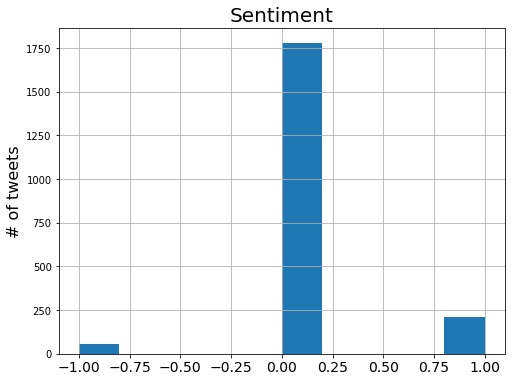

In [17]:
plt.figure(figsize=(8,6))
df_clean.Sentiment.hist(xlabelsize=14)
plt.title('Sentiment', fontsize=20)
plt.ylabel('# of tweets', fontsize=16)
plt.show()

The labels are highly imbalanced whether the data is taken as a binary classification problem with Positive vs. Negative emotions or taken as a multiclass classification problem with all three labels.

## How long are the tweets?

In [19]:
df_clean['tweet_len'] = df_clean.pretweet.apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


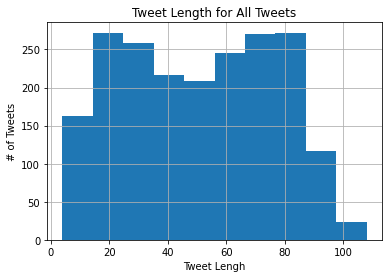

In [20]:
df_clean.tweet_len.hist()
plt.title('Tweet Length for All Tweets')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

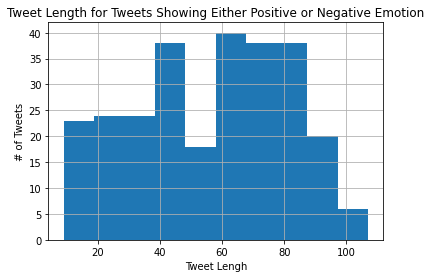

In [21]:
df_clean[df_clean.Sentiment != 0].tweet_len.hist()
plt.title('Tweet Length for Tweets Showing Either Positive or Negative Emotion')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

In [22]:
df_clean.tweet_len.max()

108

In [23]:
pd.set_option('display.max_colwidth', None)

In [24]:
df_clean[df_clean.tweet_len > 100].head()

,Unnamed,tweet,location,pretweet,Sentiment,tweet_len
38,65823,"@NAkufoAddo The only old man in our political scene who thinks about this stomach, families and friends. U r the Nebucatnezzeh of our time","Kumasi, Ghana",the onli old man our polit scene who think about thi stomach famili and friend the nebucatnezzeh our time,0.0,105
121,65921,@NAkufoAddo We extend our deepest condolences to those who lost their loved ones and pray a speedy recovery for the wounded persons.,NaN,extend our deepest condol those who lost their love one and pray speedi recoveri for the wound person,0.0,101
374,66217,"My Ghanass Chemistry teacher and current headmaster speaks passionately about free shs, you could feel and see whatâ€¦ https://t.co/ElmBJ8Mir9",Universe,ghanass chemistri teacher and current headmast speak passion about free sh you could feel and see what,0.0,102
379,66222,WOW. Black West Africa Is Not a Priority!!! Did the African leaders &amp; people hear that. Black West Africa wake up.â€¦ https://t.co/Oe1NvSz5Aw,NaN,wow black west africa not prioriti did the african leader amp peopl hear that black west africa wake up,0.0,103
435,66284,"For protection, vote for the umbrella party which will truly cover us not an elephantiasis gov't like NPP, Nana Addâ€¦ https://t.co/eUD6jNxEer",NaN,for protect vote for the umbrella parti which will truli cover not elephantiasi govt like npp nana add,0.0,102


In [ ]:
git commit -